# CHURN PREDICTION

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [180]:
df = pd.read_csv('customer_churn_dataset.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [181]:
df.shape

(440833, 12)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [183]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [184]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [187]:
df = df.dropna()

In [189]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [190]:
df.duplicated().sum()

0

In [192]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

# Numerical Features

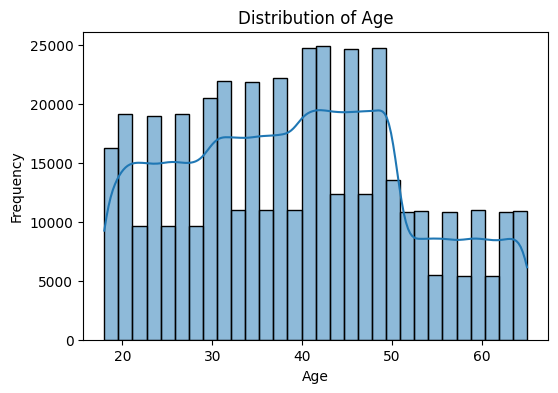

count    440832.000000
mean         39.373153
std          12.442369
min          18.000000
25%          29.000000
50%          39.000000
75%          48.000000
max          65.000000
Name: Age, dtype: float64 



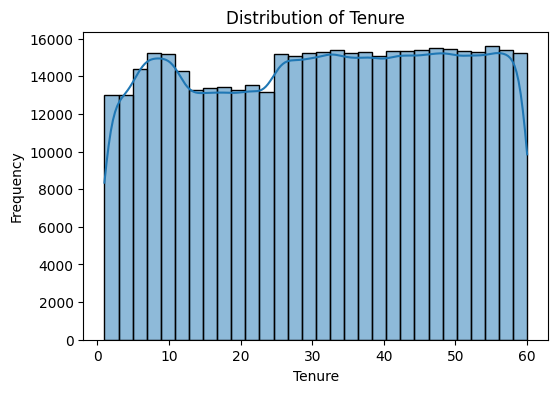

count    440832.000000
mean         31.256336
std          17.255727
min           1.000000
25%          16.000000
50%          32.000000
75%          46.000000
max          60.000000
Name: Tenure, dtype: float64 



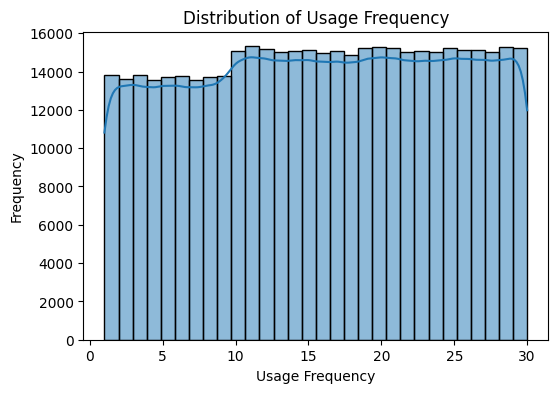

count    440832.000000
mean         15.807494
std           8.586242
min           1.000000
25%           9.000000
50%          16.000000
75%          23.000000
max          30.000000
Name: Usage Frequency, dtype: float64 



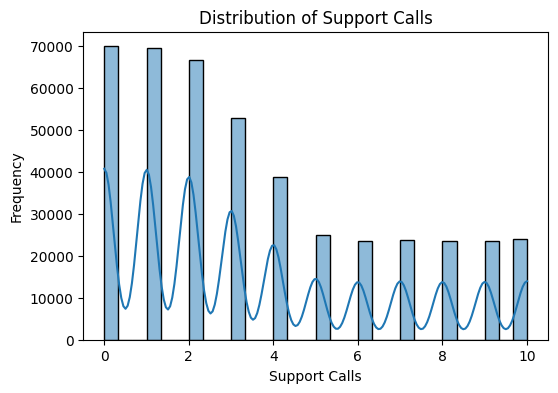

count    440832.000000
mean          3.604437
std           3.070218
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          10.000000
Name: Support Calls, dtype: float64 



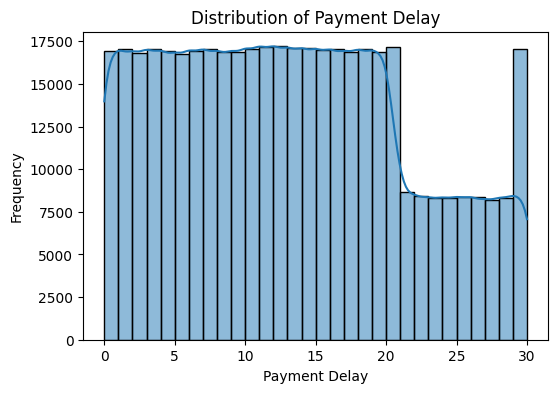

count    440832.000000
mean         12.965722
std           8.258063
min           0.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          30.000000
Name: Payment Delay, dtype: float64 



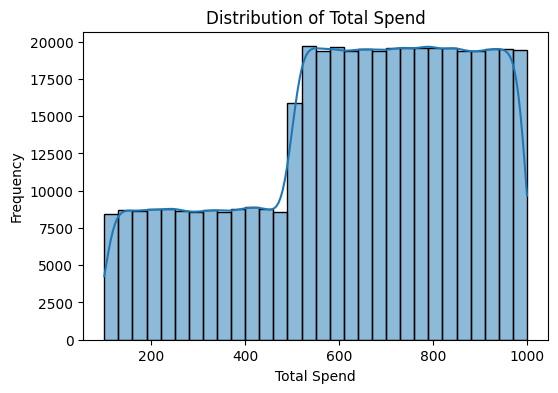

count    440832.000000
mean        631.616223
std         240.803001
min         100.000000
25%         480.000000
50%         661.000000
75%         830.000000
max        1000.000000
Name: Total Spend, dtype: float64 



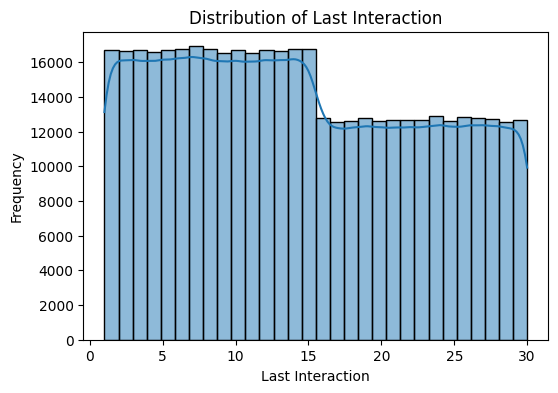

count    440832.000000
mean         14.480868
std           8.596208
min           1.000000
25%           7.000000
50%          14.000000
75%          22.000000
max          30.000000
Name: Last Interaction, dtype: float64 



In [196]:
num_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
            'Payment Delay', 'Total Spend', 'Last Interaction']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    print(df[col].describe(), "\n")


## INNSIGHTs: central tendency, spread, outliers—and possible skewness.

# Categorical Features

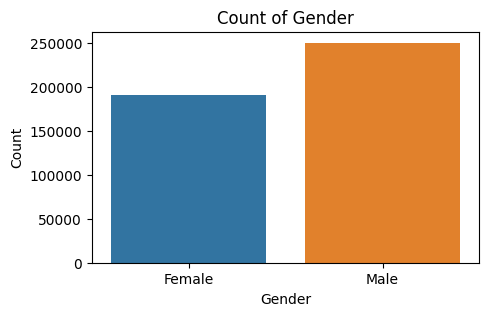

Gender
Male      0.567681
Female    0.432319
Name: proportion, dtype: float64 



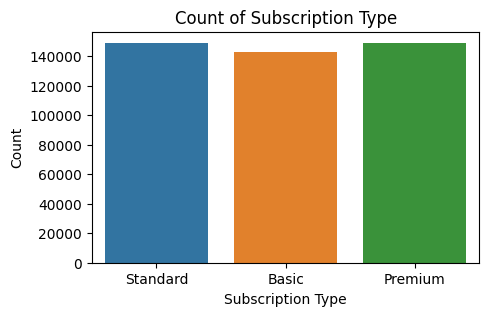

Subscription Type
Standard    0.338288
Premium     0.337267
Basic       0.324446
Name: proportion, dtype: float64 



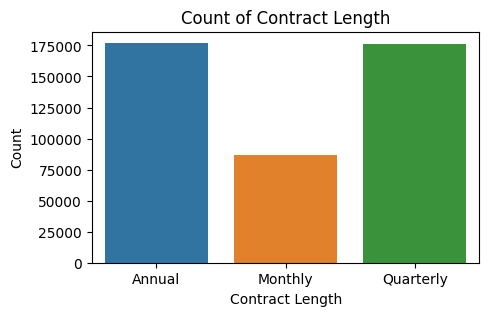

Contract Length
Annual       0.401963
Quarterly    0.400447
Monthly      0.197590
Name: proportion, dtype: float64 



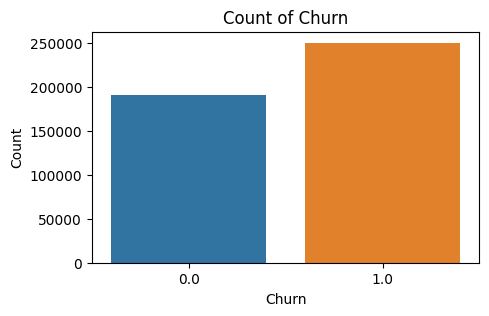

Churn
1.0    0.567107
0.0    0.432893
Name: proportion, dtype: float64 



In [201]:
cat_cols = ['Gender', 'Subscription Type', 'Contract Length', 'Churn']

for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
    print(df[col].value_counts(normalize=True), "\n")


## INSIGHTs: dominant categories, class imbalance (especially for Churn), and hints for encoding.

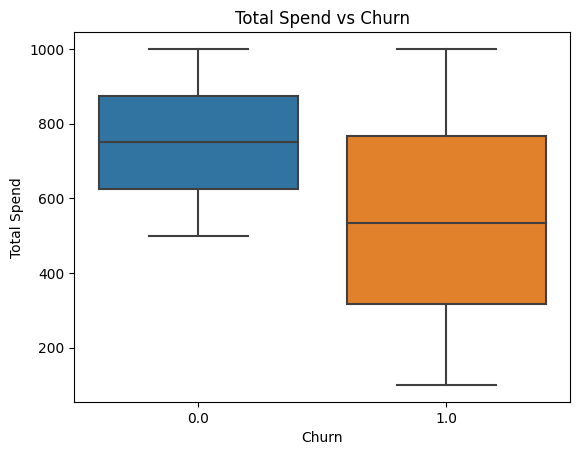

In [204]:
sns.boxplot(x='Churn', y='Total Spend', data=df)
plt.title('Total Spend vs Churn')
plt.show()

In [205]:
"""
0 = No churn, 1 = Churn
1. Median Spend Shift:
>>> middle line(churned cust is equal:Even higher spenders are leaving—maybe expectations aren't being met.)
2. Spread & Variance
>>> wider box for churned shows greater variability.
INSIGHT: churned customers have a wide spread, their spend behavior becomes unpredictable.
"""

"\n0 = No churn, 1 = Churn\n1. Median Spend Shift:\n>>> middle line(churned cust is equal:Even higher spenders are leaving—maybe expectations aren't being met.)\n2. Spread & Variance\n>>> wider box for churned shows greater variability.\nINSIGHT: churned customers have a wide spread, their spend behavior becomes unpredictable.\n"

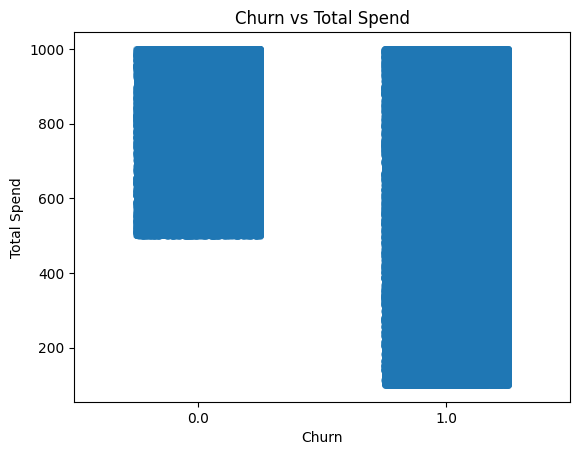

In [206]:
# Add jitter to better visualize binary class
sns.stripplot(x='Churn', y='Total Spend', data=df, jitter=0.25, alpha=0.6)
plt.title('Churn vs Total Spend')
plt.show()


In [207]:
df.groupby('Gender')['Churn'].mean()

Gender
Female    0.666691
Male      0.491269
Name: Churn, dtype: float64

In [208]:
df.groupby('Subscription Type')['Churn'].mean()

Subscription Type
Basic       0.581782
Premium     0.559417
Standard    0.560700
Name: Churn, dtype: float64

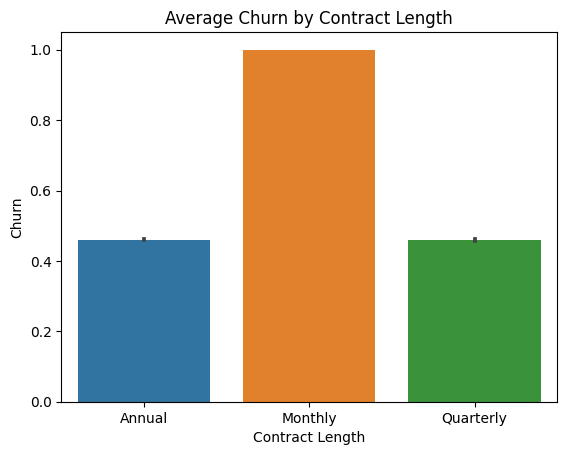

In [209]:
sns.barplot(x='Contract Length', y='Churn', data=df)
plt.title('Average Churn by Contract Length')
plt.show()

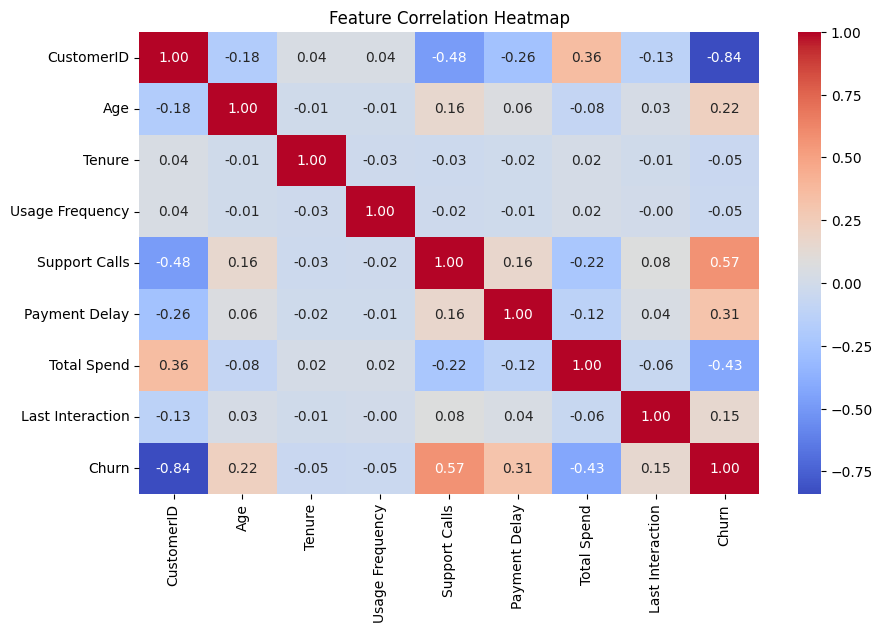

In [210]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

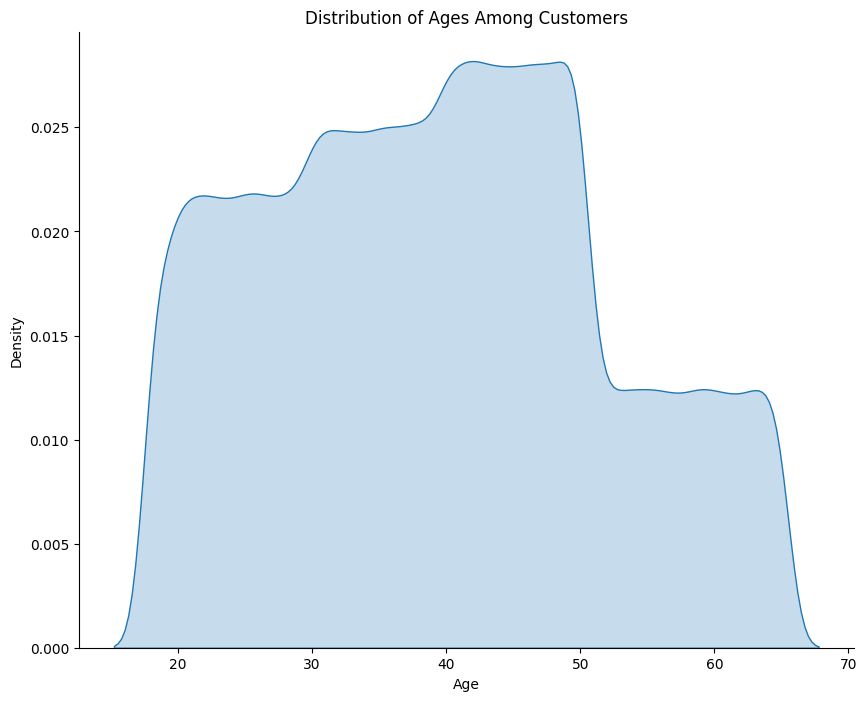

In [211]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df.Age , fill = True , common_norm=False)
plt.title('Distribution of Ages Among Customers')
sns.despine()
plt.show()

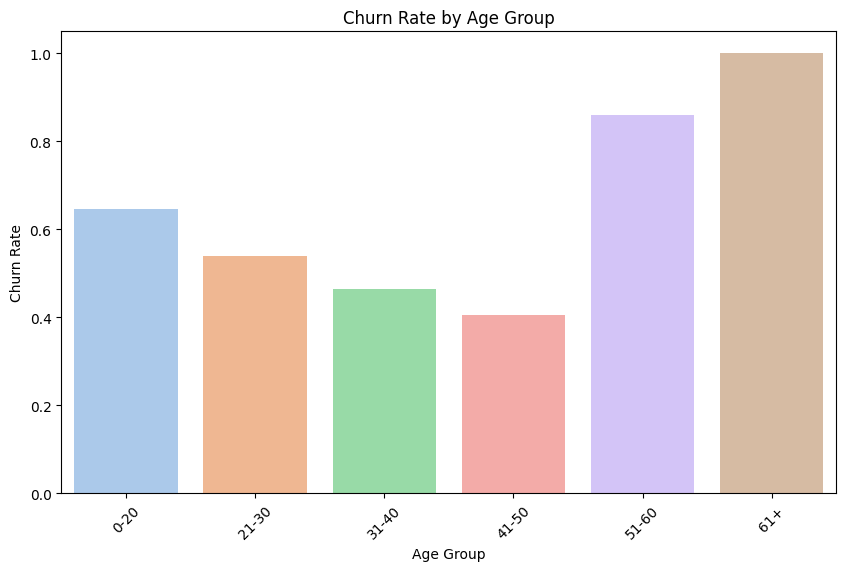

In [212]:
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_churn_rate = df.groupby('AgeGroup')['Churn'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values, palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.xticks(rotation=45)
plt.show()

In [233]:
# """
# Age is normally distributed but is slighlty positively skewed which means we have more younger Customers

# We have a significant number of customers in the 40-50 age range, with a smaller but still substantial group in the 20-30 age range

# as you can see almost half of the customers in the 20-30 group Churn but the churn rate drops for the next age groups until 41-50 age group

# Everyone who is older than 60 Churn!!!
# """

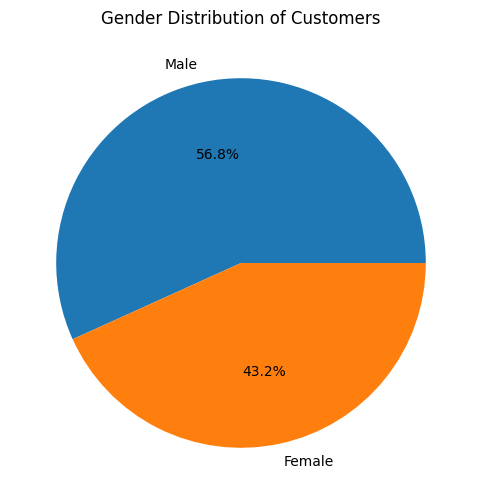

In [235]:
plt.figure(figsize=(6, 6))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()

# FEATURE ENGINEERING

In [238]:
df['SupportCallsPerTenure'] = df['Support Calls'] / (df['Tenure'] + 1)
df['SpendPerInteraction'] = df['Total Spend'] / (df['Last Interaction'] + 1)

In [240]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,30,45,60,80], labels=['18-30','31-45','46-60','61+'])

In [242]:
df = pd.get_dummies(df, columns=['Subscription Type', 'Contract Length', 'Gender'], drop_first=True)

# Correlation Analysis

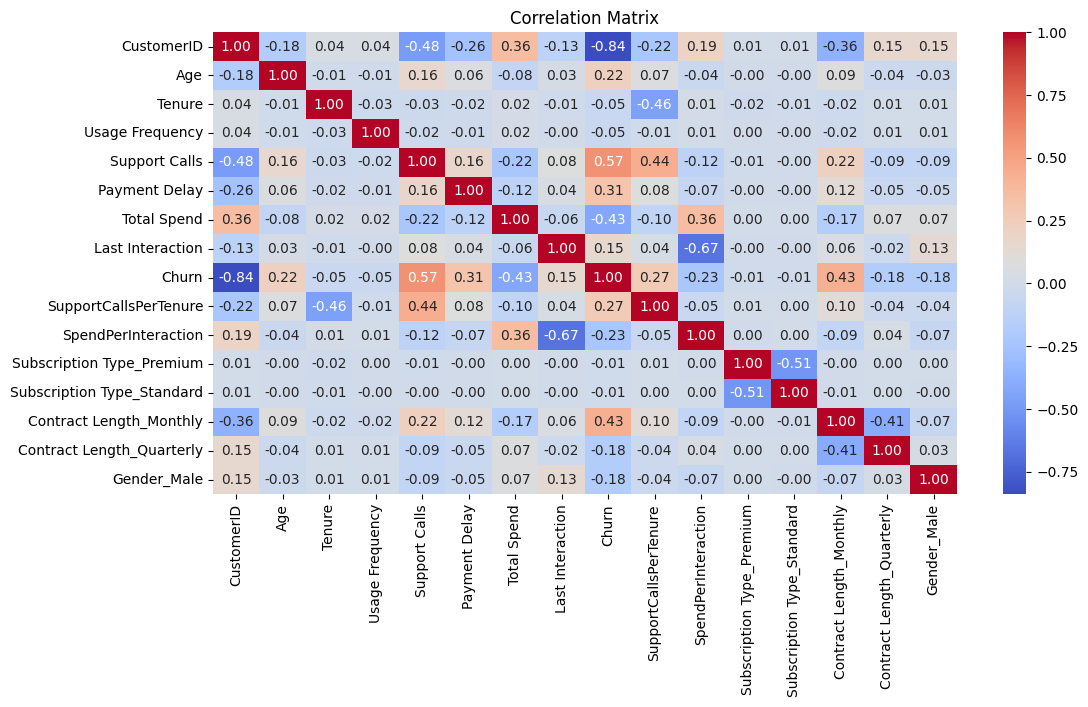

In [244]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Feature Selection

In [246]:
# Drop identifier and target from features
x = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']

In [248]:
x = pd.get_dummies(x, drop_first=True)


In [250]:
# RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
selector = RFE(model, n_features_to_select=8)
selector.fit(x, y)
x_selected = selector.transform(x)


In [251]:
# Lasso (L1 Regularization)
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5).fit(x, y)
importance = np.abs(lasso.coef_)
selected_features = x.columns[importance > 1e-4]

# PCA, LDA, Scaling

In [252]:
# Standardize before PCA/LDA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [253]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  #retain 95% accuracy
x_pca = pca.fit_transform(x_scaled)

In [254]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
x_lda = lda.fit_transform(x_scaled,y)

In [255]:
# Create a DataFrame to hold the LDA component and the target
lda_df = pd.DataFrame({
    'LDA_1': x_lda.ravel(),    # Flatten to 1D array
    'Churn': y.values          # Make sure it's aligned with X_lda
})


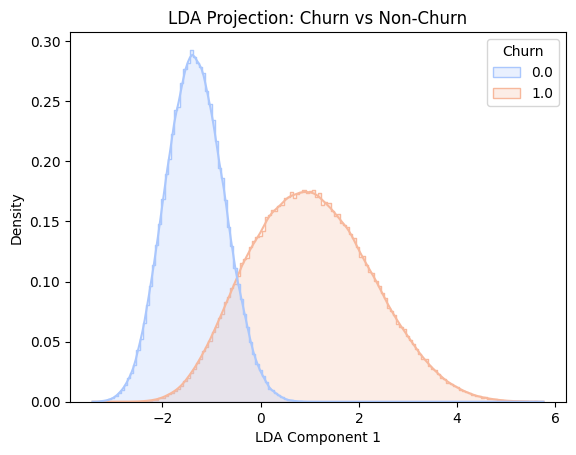

In [256]:
sns.histplot(data=lda_df, x='LDA_1', hue='Churn', kde=True, element='step', stat='density', palette='coolwarm')
plt.title('LDA Projection: Churn vs Non-Churn')
plt.xlabel('LDA Component 1')
plt.ylabel('Density')
plt.show()

In [258]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [164]:
# 3 Different Models with Cross-Validation

In [259]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Avg Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")


Logistic Regression: Avg Accuracy = 0.9093, Std = 0.0013
Random Forest: Avg Accuracy = 0.9988, Std = 0.0001
XGBoost: Avg Accuracy = 0.9999, Std = 0.0001


# Hyperparameter Tuning

In [271]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200],
    'max_depth':[5,10,None],
    'min_samples_split':[2,5],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3, scoring='accuracy')
grid.fit(x_train, y_train)

print('Best parameters:', grid.best_params_)
best_model = grid.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


Accuracy: 0.9987863940022911
F1 Score: 0.9989311223215623

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



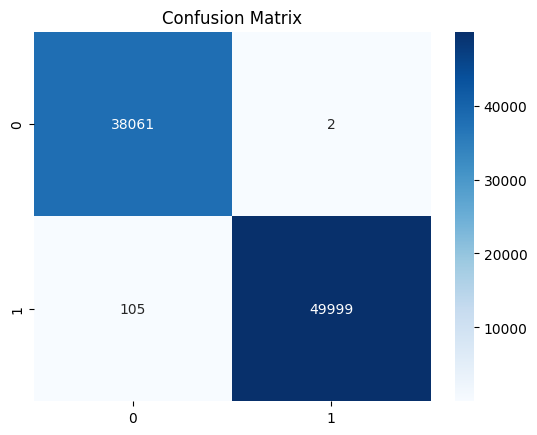

In [272]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

y_pred = best_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
'''
Precision → Of the predicted churners, how many actually churned?

Recall → Of the actual churners, how many did the model catch?

F1 Score → Balanced average of precision & recall